<a href="https://colab.research.google.com/github/prafgup/electronic_invoicing/blob/master/Flipkart_Grid_noobEZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload Models, Datasets etc. Upload PDFs of Invoices


In [ ]:
from google.colab import files
files.upload()

Saving Sample16.pdf to Sample16 (1).pdf


{'Sample16.pdf': b'%PDF-1.7\n%\xe2\xe3\xcf\xd3\n3 0 obj\n<<\n/Type /XObject\n/Subtype /Image\n/Width 2209\n/Height 3219\n/BitsPerComponent 8\n/ColorSpace /DeviceRGB\n/Filter /DCTDecode\n/DecodeParms <<\n/Quality 80\n>>\n/Length 5 0 R\n>>\nstream\n\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc0\x00\x11\x08\x0c\x93\x08\xa1\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJ

Convert PDF File to Image


In [ ]:
!apt-get install poppler-utils 
!pip install poppler
!pip install pdf2image

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.10).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
ERROR: Could not find a version that satisfies the requirement poppler (from versions: none)
ERROR: No matching distribution found for poppler


Converting each page of PDF files to Images

In [ ]:
from pdf2image import convert_from_path

from pdf2image.exceptions import (
 PDFInfoNotInstalledError,
 PDFPageCountError,
 PDFSyntaxError
)
sample_16 = convert_from_path('Sample16.pdf',dpi=400,grayscale=True)


for i, image in enumerate(sample_16):
    fname = 'sample_1_'+str(i)+'.png'
    image.save(fname, "PNG")


Preprocessing the image so that text can be better recognised.
1. Converted Image to GreyScale
2. Removed Noise 
3. Used Adaptive Gaussian Thresholding 

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
def preprocess(path):
  #Read Image from Path
  image = cv2.imread(path)

  #Apply Deskewing for scans that are not aligned vertically
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  gray = cv2.bitwise_not(gray)
  thresh = cv2.threshold(gray, 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
  coords = np.column_stack(np.where(thresh > 0))
  angle = cv2.minAreaRect(coords)[-1]
  
  if angle < -45:
	  angle = -(90 + angle)
  else:
	  angle = -angle
  (h, w) = image.shape[:2]
  center = (w // 2, h // 2)
  M = cv2.getRotationMatrix2D(center, angle, 1.0)
  rotated = cv2.warpAffine(image, M, (w, h),
	flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
  #Apply Grayscaling
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  #Denoise the Image
  denoised_image=cv2.fastNlMeansDenoising(gray_image,None)
  #Apply Adaptive Gaussian Thresholding
  final = cv2.adaptiveThreshold(denoised_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
  #Resizing Image to 1920*1080
  final=cv2.resize(final,(1080,1920))
  cv2_imshow(final)
  cv2.imwrite(path,final)
  return final
  


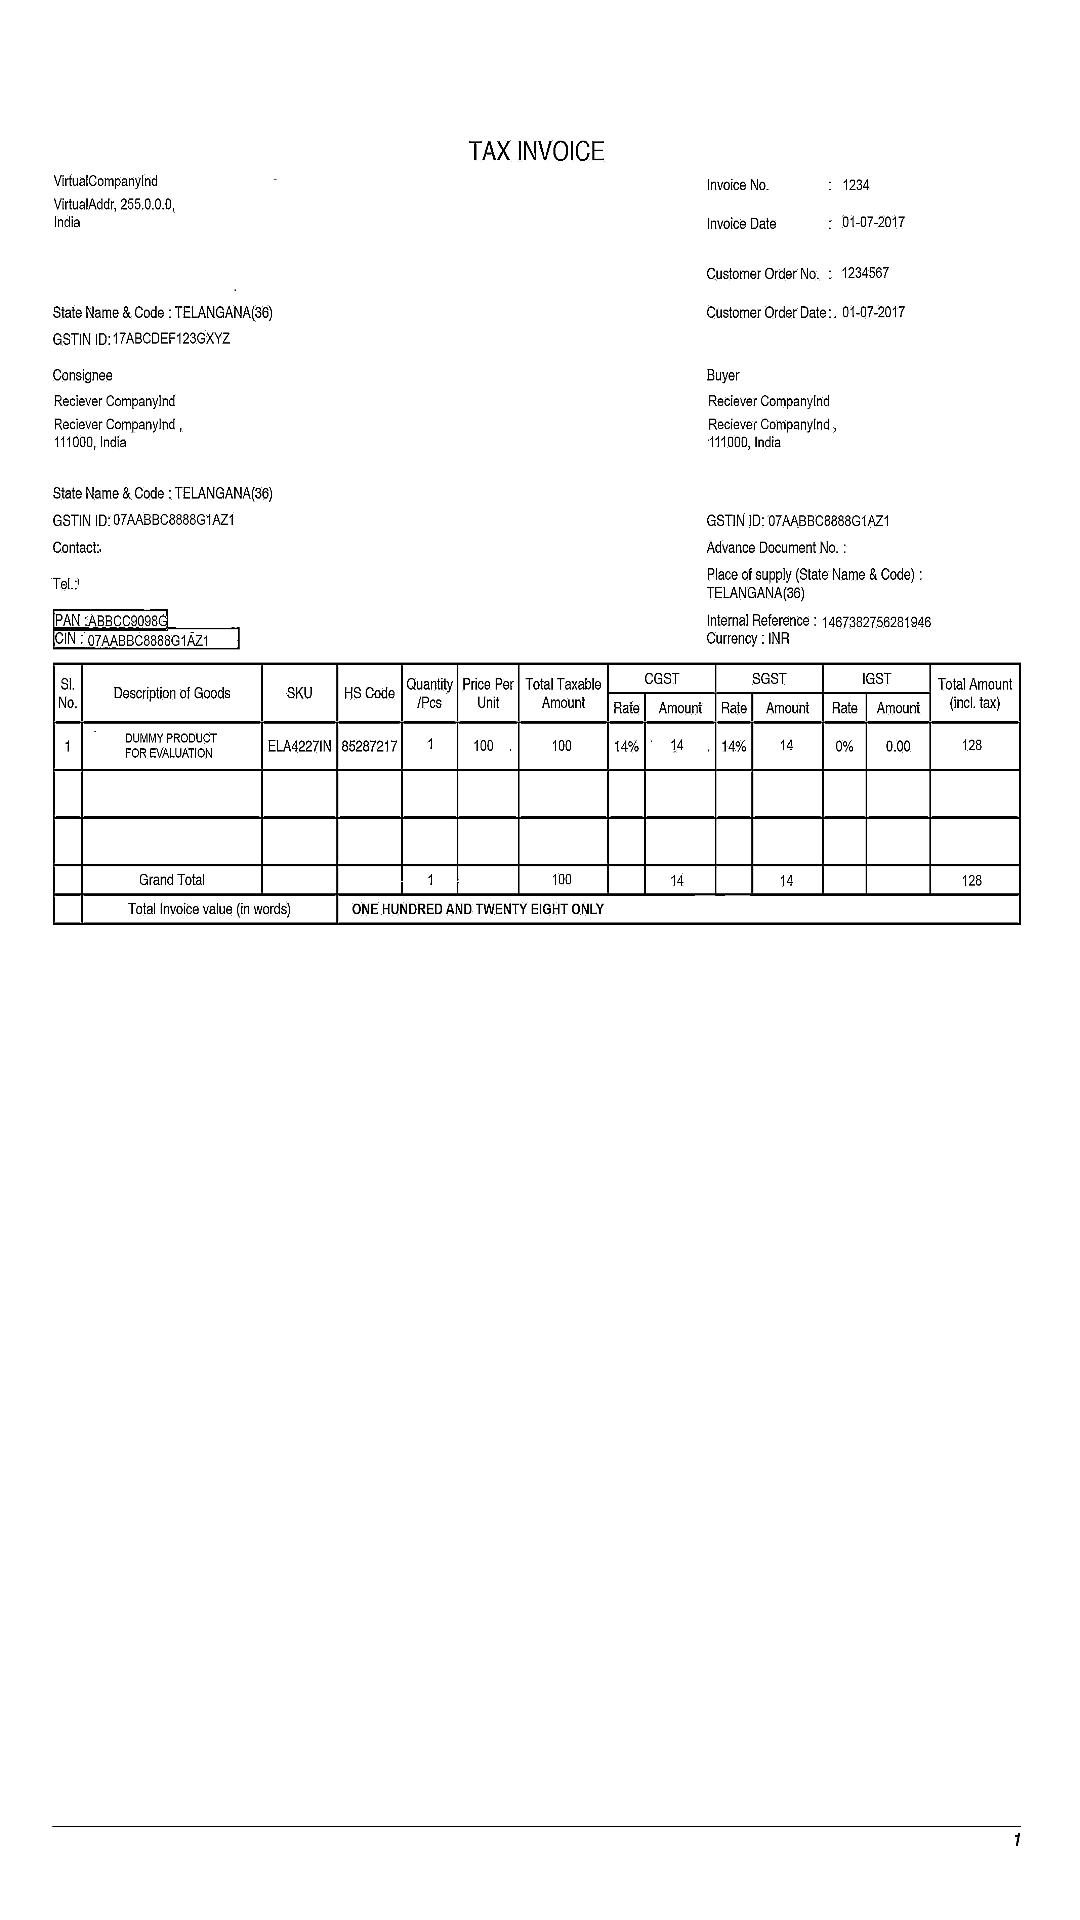

In [ ]:
img1=preprocess("sample_1_0.png")


Used Teserract OCR to get bounding box and text for each word


In [59]:
!apt-get install teserract-ocr
!pip install pytesseract
!apt-get install tesseract-ocr-eng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package teserract-ocr
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-eng is already the newest version (4.00~git24-0e00fe6-1.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [60]:
import pytesseract
from pytesseract import Output

In [ ]:
!pip install pillow

Confidence: 96
Text: TAX
['TAX', [464, 135, 47, 25], 96]

Confidence: 96
Text: INVOICE
['INVOICE', [514, 135, 90, 26], 96]

Confidence: 40
Text: VirtuatCompanyind
['VirtuatCompanyind', [49, 169, 108, 20], 40]

Confidence: 93
Text: Invoice
['Invoice', [703, 174, 43, 16], 93]

Confidence: 92
Text: No.
['No.', [746, 174, 23, 16], 92]

Confidence: 91
Text: 1234
['1234', [839, 174, 30, 16], 91]

Confidence: 43
Text: Virtuelddr,
['Virtuelddr,', [49, 193, 67, 19], 43]

Confidence: 44
Text: 256.0.0.0,
['256.0.0.0,', [116, 193, 59, 20], 44]

Confidence: 71
Text: india
['india', [50, 211, 30, 16], 71]

Confidence: 81
Text: Invoice
['Invoice', [703, 212, 43, 17], 81]

Confidence: 95
Text: Date
['Date', [746, 213, 30, 16], 95]

Confidence: 15
Text: 2
['2', [824, 215, 8, 7], 15]

Confidence: 69
Text: 04-07-2017
['04-07-2017', [838, 210, 67, 17], 69]

Confidence: 82
Text: Customer
['Customer', [702, 263, 54, 16], 82]

Confidence: 91
Text: Order
['Order', [752, 263, 45, 16], 91]

Confidence: 91
Text:

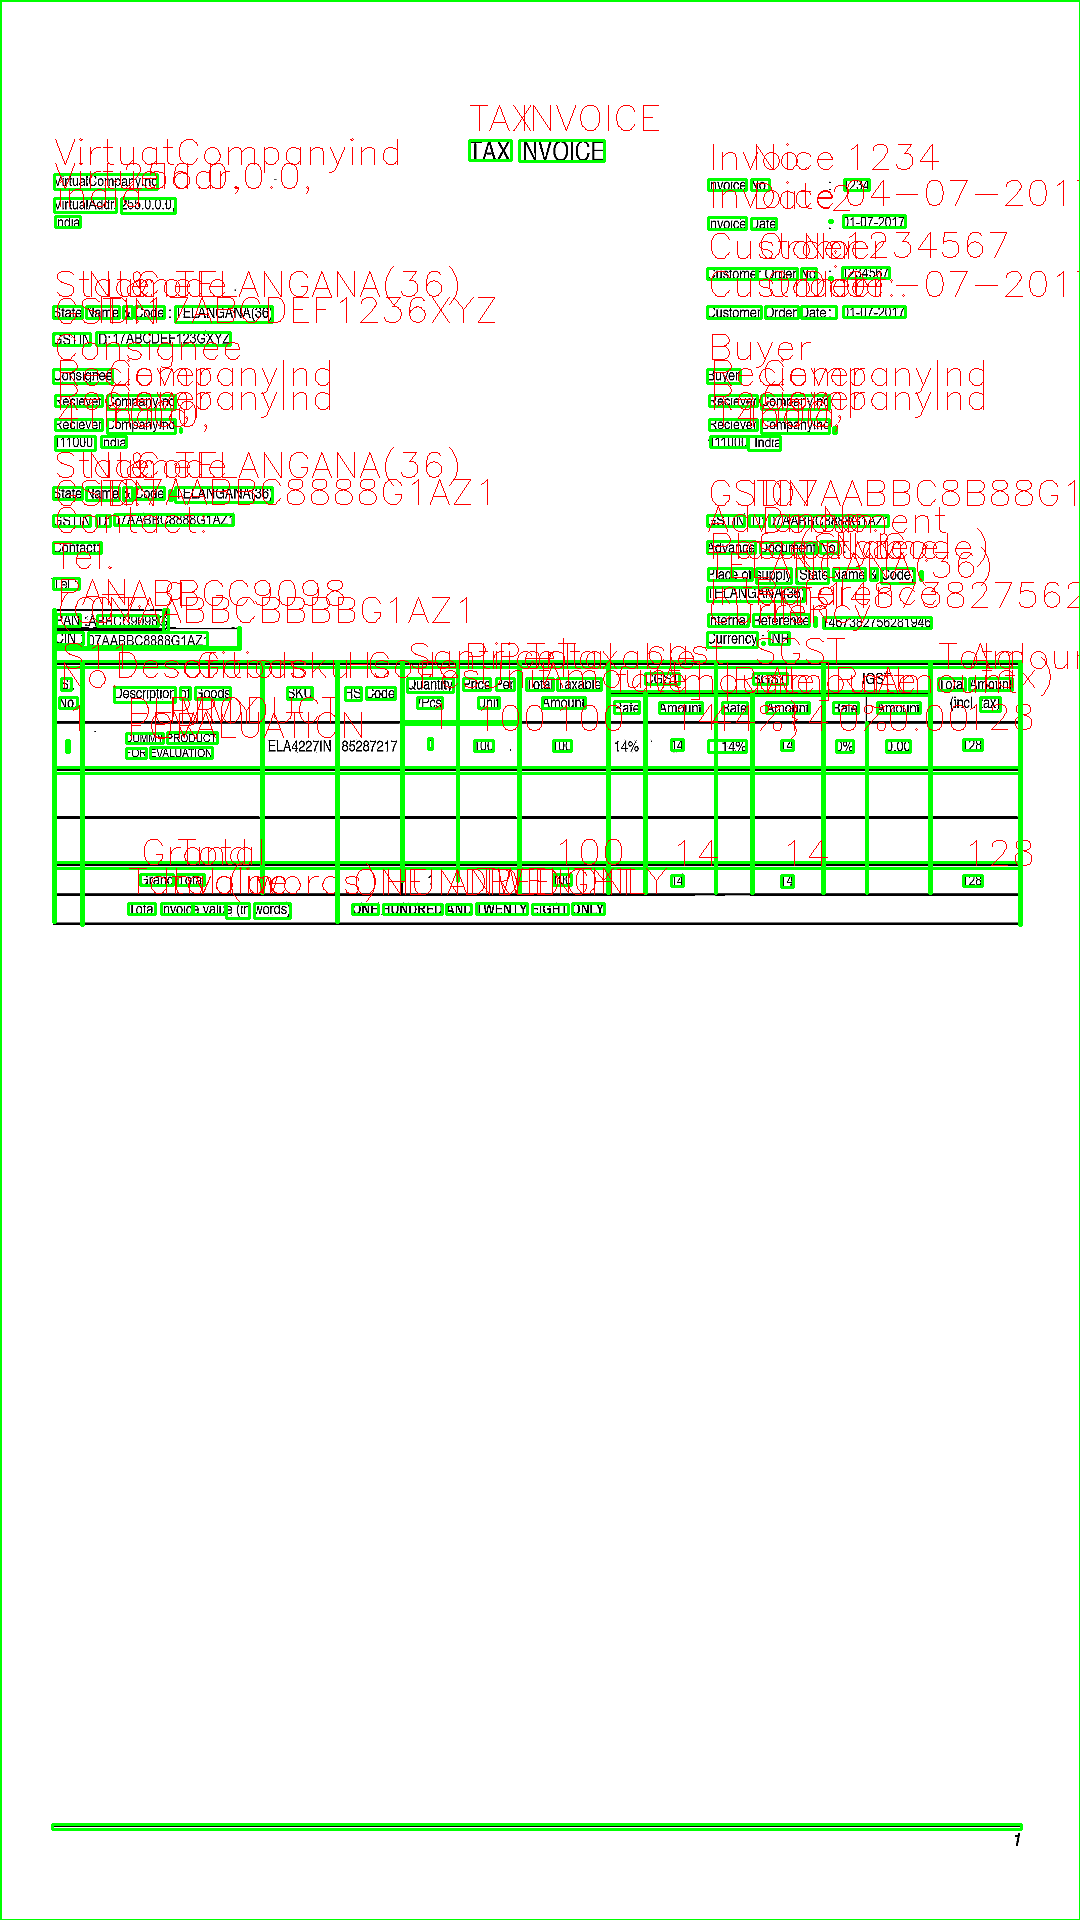

-1

In [61]:
from pytesseract import Output
import pytesseract
import cv2
# load the input image, convert it from BGR to RGB channel ordering,
# and use Tesseract to localize each area of text in the input image
image = cv2.imread("sample16.png")
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = pytesseract.image_to_data(rgb, output_type=Output.DICT,timeout=30)
boxes=[]
# loop over each of the individual text localizations
for i in range(0, len(results["text"])):
	# extract the bounding box coordinates of the text region from
	# the current result
	x = results["left"][i]
	y = results["top"][i]
	w = results["width"][i]
	h = results["height"][i]

	# extract the OCR text itself along with the confidence of the
	# text localization
	text = results["text"][i]
	conf = int(results["conf"][i])

	# filter out weak confidence text localizations
	if conf >0 :
		# display the confidence and text to our terminal
		print("Confidence: {}".format(conf))
		print("Text: {}".format(text))
	
		
		temp=[text,[x-5,y-5,w+5,h+5],conf]
		print(temp)
		print("")
		if(len(text)>2):
			boxes.append(temp)

		# strip out non-ASCII text so we can draw the text on the image
		# using OpenCV, then draw a bounding box around the text along
		# with the text itself
		text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
		cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
		cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
			1.2, (0, 0, 255), 1)

# show the output image
cv2_imshow(image)
cv2.waitKey(0)

Read template Data from JSON File. 

In [62]:
!pip install openpyxl

In [63]:
from openpyxl import load_workbook
import csv

In [64]:
import json
jsonData = ""
#Read Data from json file here. Assuming a format of type data2= [[code,[x,y,w,h]],[code,[x,y,w,h]],....]
with open("boundingBox.json") as BOB:
    jsonData=json.load(BOB)
parsedData = []
for x in jsonData:
  parsedData.append([int(x['label']) , [x['left'],x['top'],x['width'],x['height'],]])
print(parsedData)

[[0, [459, 127, 154, 40]], [1, [171, 301, 106, 22]], [2, [47, 164, 118, 31]], [4, [50, 367, 146, 91]], [9, [837, 177, 42, 17]], [10, [834, 209, 78, 29]], [24, [86, 726, 173, 135]], [22, [266, 729, 62, 129]]]


Account for differences in position of text in Image and the template
 

In [65]:

minYT=1000000
minXT=1000000
minYD=1000000
minXD=1000000
for row in parsedData:
  if row[1][1]<minYT:
    minYT=row[1][1]
    minXT=row[1][0]
    
for row in boxes:
  if row[1][1]<minYD:
    minYD=row[1][1]
    minXD=row[1][0]

diffX=minXT-minXD
diffY=minYT-minYD

for row in parsedData:
  row[1][0]+=diffX
  row[1][1]+=diffY

In [66]:
print(parsedData)

[[0, [454, 119, 154, 40]], [1, [166, 293, 106, 22]], [2, [42, 156, 118, 31]], [4, [45, 359, 146, 91]], [9, [832, 169, 42, 17]], [10, [829, 201, 78, 29]], [24, [81, 718, 173, 135]], [22, [261, 721, 62, 129]]]


In [67]:
image = cv2.imread("sample16.png")
#data2=[[1,[160,427,308,35]]]
wb = load_workbook(filename = "sheet.xlsx")
ws = wb.get_active_sheet()
for row in parsedData:
  x=row[1][0]
  y=row[1][1]
  w=row[1][2]
  h=row[1][3]
  crop=image[y-5:y+h+5,x-5:x+w+5]
  #cv2_imshow(crop)
  crop_rgb = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
  text=pytesseract.image_to_string(crop_rgb,lang='eng',timeout=10)
  print(text)
  code=row[0]
  if code==1:
    #print("Hello")
    ws.cell(row=3,column=5).value=text
   # print(ws.cell(row=3,column=5).value)
  
  if code==2:
    ws.cell(row=4,column=5).value=text
  
  if code==3:
    ws.cell(row=5,column=5).value=text
  
  if code==4:
    ws.cell(row=6,column=5).value=text

  if code==5:
    ws.cell(row=11,column=5).value=text

  if code==6:
    ws.cell(row=12,column=5).value=text

  if code==7:
    ws.cell(row=13,column=5).value=text

  if code==8:
    ws.cell(row=14,column=5).value=text

  if code==9:
    ws.cell(row=3,column=13).value=text

  if code==10:
    ws.cell(row=4,column=13).value=text

  if code==11:
    ws.cell(row=5,column=13).value=text

  if code==12:
    ws.cell(row=6,column=13).value=text

  if code==13:
    ws.cell(row=7,column=13).value=text

  if code==14:
    ws.cell(row=8,column=13).value=text

  if code==15:
    ws.cell(row=9,column=13).value=text
  
  if code==16:
    ws.cell(row=10,column=13).value=text

  if code==17:
    ws.cell(row=11,column=13).value=text

  if code==18:
    ws.cell(row=12,column=13).value=text

  if code==19:
    ws.cell(row=13,column=13).value=text

  if code==20:
    ws.cell(row=14,column=13).value=text

  if code>=21:
    lines=text.splitlines()
    for i in range(len(lines)):
      ws.cell(row=18+i,column=2+code-21).value=lines[i]
wb.save('d.xlsx')
wb.close()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated function get_active_sheet (Use the .active property).
  after removing the cwd from sys.path.


TAX INVOICE
>: TELANGANAI36)
VirtuatCompanyind
Consignee

Reciever Companylnd

Reciever Companylnd ,
411000, India
4934
+ 04-07-2017
Duy PRODUCT
FOR EVALUATION
ELA227Ih
